In [1]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

/Users/vt908/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Petrob, BrazCurr,WTI = load_Petrobras()
#print(Petrob, BrazCurr,WTI)

In [3]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))

3198
3198
3198


In [4]:
from datetime import datetime
dates_list = []
for i in range(np.size(New_Dates)-1,0,-1):
    
    date_str = New_Dates[i]

    date_object = datetime.strptime(date_str, '%d.%m.%Y').date()
    dates_list.append(date_object)
#print(dates_list)

In [5]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))



In [6]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

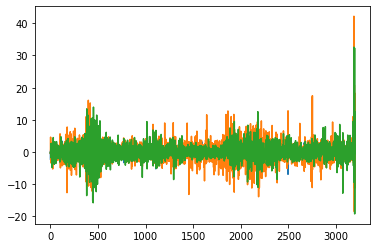

In [7]:
returns_mat = np.flip(returns_mat,axis=0)

plt.plot(returns_mat)

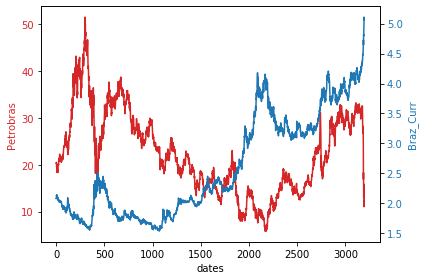

In [8]:
data = np.flip(data,axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

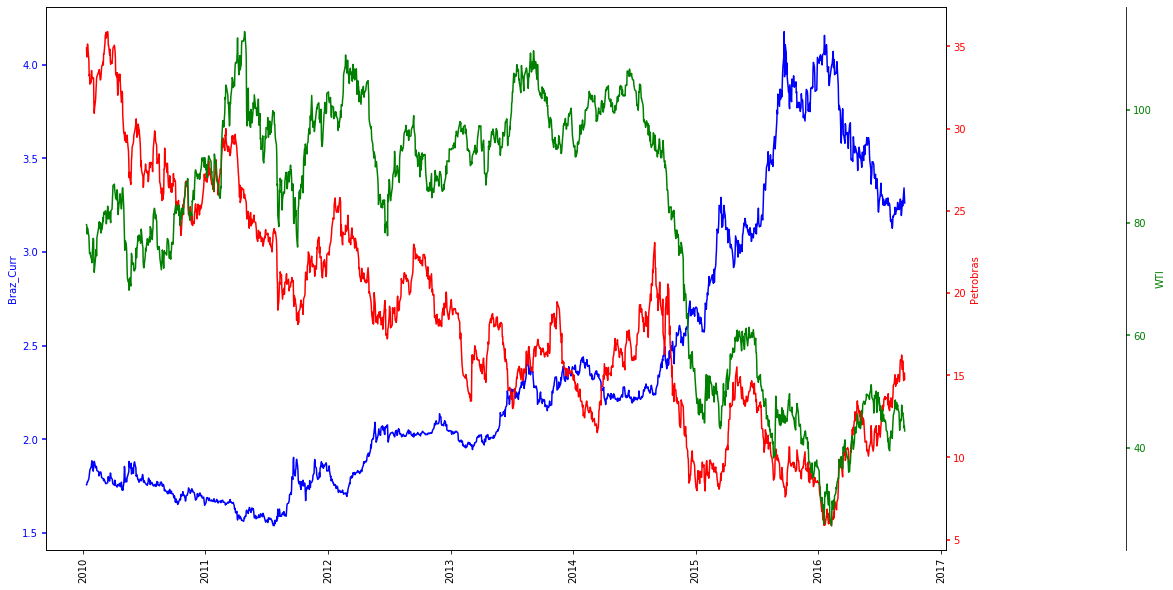

In [9]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize=(20, 10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
dates = dates_list[-2500:-865]

p1, = host.plot(dates,data[-2500:-865,0], "b-", label="Braz_Curr")
p2, = par1.plot(dates,data[-2500:-865,1], "r-", label="Petrobras")
p3, = par2.plot(dates,data[-2500:-865,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
degrees = 90
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x',labelrotation=degrees)

lines = [p1, p2, p3]

#host.legend(lines, [l.get_label() for l in lines],loc='lower right', bbox_to_anchor=(1, 0.5))

plt.show()


In [14]:
import pickle as pkl
with open("/Users/vt908/Dropbox (Personal)/finance_graphical_modles/results/Forecast_real.pickle", "rb" ) as f:
    forecast_real = pkl.load(f)

In [18]:
X = forecast_real[2]

In [29]:
forecast_real

[array([[-0.51223677,  0.9166428 ,  1.43126177],
        [-0.08529997,  1.63027656,  0.32749717],
        [-0.74504713, -0.5788712 ,  1.78205128],
        ...,
        [-0.86160474, -0.87837838,  3.02891235],
        [ 1.21729651, -2.24570674, -0.75153724],
        [ 1.23229722,  2.57452575,  2.04508482]]),
 array([[ 1.757 , 34.91  , 79.65  ],
        [ 1.7585, 34.35  , 79.39  ],
        [ 1.7717, 34.55  , 78.    ],
        ...,
        [ 3.3426, 14.8   , 43.58  ],
        [ 3.3024, 15.14  , 43.91  ],
        [ 3.2622, 14.76  , 43.03  ]]),
         method     TS       MAE    std AB
 0          lgb  var 0  0.026189  0.019941
 1         LSTM  var 0  0.028734  0.019958
 2          VAR  var 0  0.028379  0.020478
 3   Kernel_RBF  var 0  0.027327  0.019574
 4      HHM_GGM  var 0  0.027832  0.019101
 5          lgb  var 1  0.363769  0.264529
 6         LSTM  var 1  0.363707  0.265076
 7          VAR  var 1  0.362670  0.260658
 8   Kernel_RBF  var 1  0.369177  0.259375
 9      HHM_GGM  var 1  

In [22]:
means = [np.mean(X[X['method']==m]['MAE']) for m in np.unique(X['method'])]
stds = [np.mean(X[X['method']==m]['std AB']) for m in np.unique(X['method'])]

<ErrorbarContainer object of 3 artists>

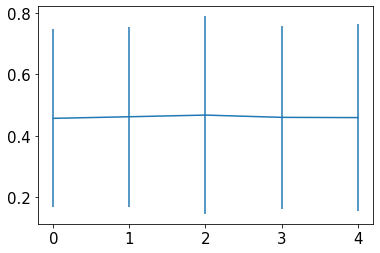

In [28]:
plt.errorbar(np.arange(5), means, stds)

/Users/vt908/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


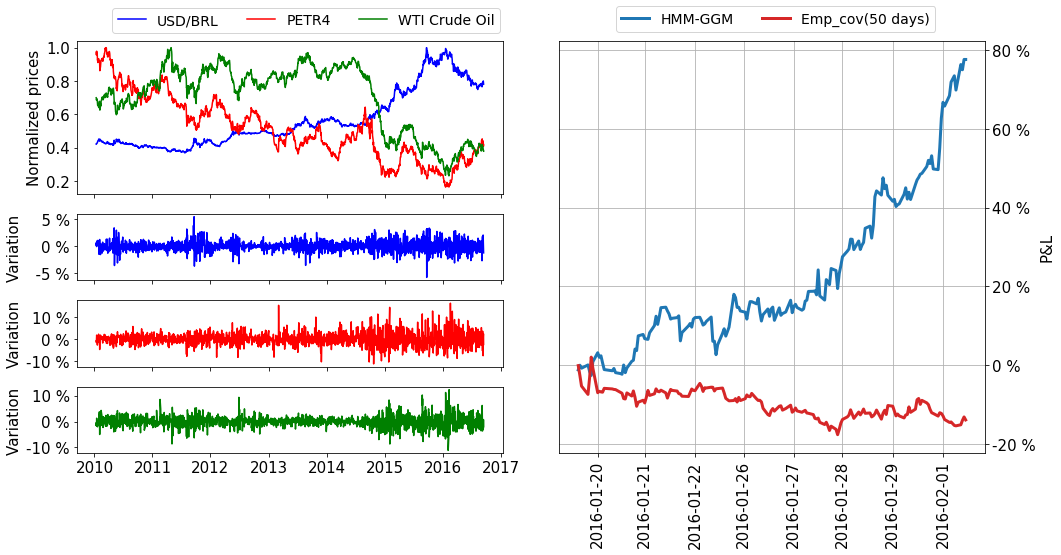

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size':15})

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig3 = plt.figure(constrained_layout=True, figsize=(15,8))
gs = fig3.add_gridspec(5, 2)
f3_ax1 = fig3.add_subplot(gs[0:2, :-1])
f3_ax2 = fig3.add_subplot(gs[2, :-1])
f3_ax3 = fig3.add_subplot(gs[3, :-1])
f3_ax4 = fig3.add_subplot(gs[4, :-1])
f3_ax5 = fig3.add_subplot(gs[:, 1])

f3_ax1.plot(dates,data[-2500:-865,0]/np.max(data[-2500:-865,0]), "b-", label="USD/BRL")
f3_ax1.plot(dates,data[-2500:-865,1]/np.max(data[-2500:-865,1]), "r-", label="PETR4")
f3_ax1.plot(dates,data[-2500:-865,2]/np.max(data[-2500:-865,2]), "g-", label="WTI Crude Oil")

f3_ax1.set_xticklabels([])
f3_ax1.legend(ncol=3, bbox_to_anchor=(0.067, 1.005), fontsize=14)

f3_ax1.set_ylabel('Normalized prices')



f3_ax2.plot(dates, [(data[i,0] - data[i-1, 0])/data[i-1, 0]*100 for i in range(-2500, -865)], "b-")
f3_ax3.plot(dates, [(data[i,1] - data[i-1, 1])/data[i-1, 1]*100 for i in range(-2500, -865)], "r-")
f3_ax4.plot(dates, [(data[i,2] - data[i-1, 2])/data[i-1, 2]*100 for i in range(-2500, -865)], "g-")

f3_ax2.set_yticks([-5, 0, 5])
f3_ax2.set_yticklabels(['  -5 %', '0 %', '  5 %'])

f3_ax2.set_xticklabels([])
f3_ax2.set_ylabel('Variation')



f3_ax3.set_yticks([-10, 0, 10])
f3_ax3.set_yticklabels(['-10 %', '0 %', '10 %'])


f3_ax3.set_xticklabels([])

f3_ax3.set_ylabel('Variation')

f3_ax4.set_yticks([-10, 0, 10])
f3_ax4.set_yticklabels(['-10 %', '0 %', '10 %'])

f3_ax4.set_ylabel('Variation')
#f3_ax4.set_xlabel('Dates')

# lines = [p1, p2, p3]
f3_ax5.plot(dates[-165:],np.cumsum(res_pred)/1000, lw=3, color='C0', label='HMM-GGM')
f3_ax5.plot(dates[-165:],np.cumsum(res_emp)/1000, lw=3, color='C3',label='Emp_cov(50 days)')
f3_ax5.legend(ncol=2, bbox_to_anchor=(0.9, 1.1), fontsize=14)
f3_ax5.set_xticklabels(dates[-165:], rotation=90)
#f3_ax5.set_xlabel('Dates')




degrees = 90
#f3_ax5.set_xticks(rotation=degrees)
f3_ax5.yaxis.tick_right()
f3_ax5.yaxis.set_label_position("right")
f3_ax5.set_ylabel('P&L')
f3_ax5.set_yticklabels([str(int(t))+' %' for t in f3_ax5.get_yticks()])
f3_ax5.grid()

plt.tight_layout()
#plt.ylabel("Percent of capital\n")
#host.legend(lines, [l.get_label() for l in lines],loc='lower right', bbox_to_anchor=(1, 0.5))
plt.savefig("investement_real_data.pdf", dpi=200, bbox_inches='tight', transparent=True)
#plt.show()

In [24]:
import pickle
with open('res.pickle', 'rb') as f:
    [res_pred,res_today,res_emp] =  pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
plt.plot(dates[-165:],np.cumsum(res_pred)/1000)
plt.plot(dates[-165:],np.cumsum(res_emp)/1000)
degrees = 90
plt.xticks(rotation=degrees)

plt.ylabel("Percent of capital\n")

In [2]:
res_pred

[-1200.1726000000035,
 1180.1516999999992,
 -754.3645999999916,
 836.354499999992,
 -1664.173800000001,
 -1007.6777999999925,
 3472.105399999995,
 2295.9505000000026,
 -1170.2063000000062,
 394.4221999999984,
 -1815.9234000000101,
 -1685.166600000004,
 -306.0740999999997,
 582.1589000000009,
 -1056.2184000000027,
 -230.316799999998,
 -176.76089999999647,
 2342.44300000001,
 -1944.0067999999924,
 1189.6689999999958,
 1698.185600000003,
 267.7543999999955,
 2835.9872000000023,
 -392.96640000000104,
 3750.712800000002,
 359.19599999999684,
 -1075.2639999999992,
 -107.37920000000008,
 -67.48639999999807,
 1674.3151999999977,
 1834.807000000006,
 2364.5954999999913,
 -2072.7719999999936,
 1964.183499999998,
 2285.7749999999974,
 117.58569999999554,
 -925.9499999999986,
 -771.0579999999994,
 -1317.6980000000067,
 202.48600000000414,
 168.33279999999888,
 455.22719999999697,
 -6360.715300000013,
 2107.0286000000006,
 1712.8029999999974,
 588.0513000000096,
 -918.9985000000042,
 2025.585900000